Optimization

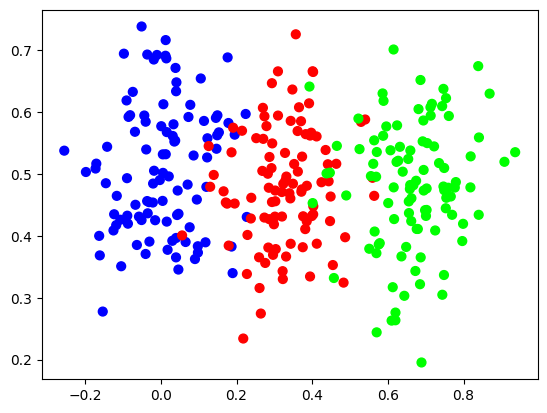

In [2]:
#SIMPLER DATASET
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

Layer Dense Class

In [3]:
import numpy as np
#Dense Layer
class Layer_Dense:
    #Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        #Init wts and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    #Forward Pass
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


Activation ReLU

In [4]:
class Activation_ReLU:
    def forward(self,inputs):
        self.output= np.maximum(0, inputs)


Activation Softmax

In [5]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values= np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output=probabilities

Loss Class

In [6]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

Categorical Cross entropy loss function class - inherits loss class

In [7]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
 # Forward pass
 def forward(self, y_pred, y_true):
  # Number of samples in a batch
  samples = len(y_pred)
  # Clip data to prevent division by 0
  # Clip both sides to not drag mean towards any value
  y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
  # Probabilities for target values -
  # only if categorical labels
  if len(y_true.shape) == 1:
   correct_confidences = y_pred_clipped[
   range(samples),
   y_true
   ]
  # Mask values - only for one-hot encoded labels
  elif len(y_true.shape) == 2:
   correct_confidences = np.sum(
   y_pred_clipped*y_true,
   axis=1
   )
 # Losses
  negative_log_likelihoods = -np.log(correct_confidences)
  return negative_log_likelihoods

Strategy 1- Randomly select weights and biases (Doesn't work)

In [8]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
 # Generate a new set of weights for iteration
 dense1.weights = 0.05 * np.random.randn(2, 3)
 dense1.biases = 0.05 * np.random.randn(1, 3)
 dense2.weights = 0.05 * np.random.randn(3, 3)
 dense2.biases = 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of the training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
   print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
   best_dense1_weights = dense1.weights.copy()
   best_dense1_biases = dense1.biases.copy()
   best_dense2_weights = dense2.weights.copy()
   best_dense2_biases = dense2.biases.copy()
   lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 acc: 0.3333333333333333
New set of weights found, iteration: 88633 loss: 1.0952065 acc: 0.3333333333333333


Strategy 2- Randomly adjust weights and biases: Dataset- Vertical data (Works!!)

In [9]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1008747 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.1005715 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.099462 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.099436 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.09855 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.098517 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0938607 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0920315 acc: 0.3333333333333333
New set of weights found, iteration: 17 loss: 1.0913911 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0910357 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0898421 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0843327 acc: 0.3333333333333333
New set of weights found, iteration: 26 loss: 1.0

Complex Dataset: Spiral data

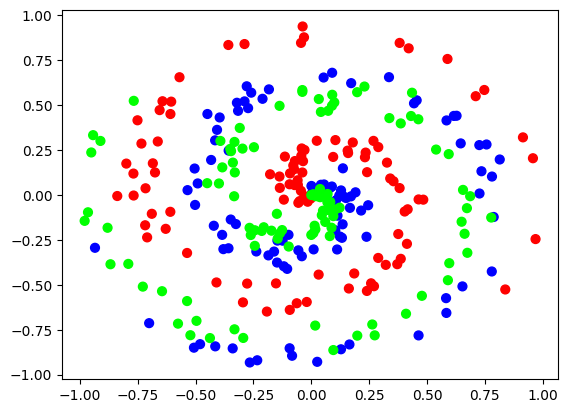

In [10]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

Strategy 2- Randomly adjust weights and biases: Spiral Data- doesn't work

In [11]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.098855 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987207 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0985456 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0984256 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0982431 acc: 0.3333333333333333
New set of weights found, iteration: 31 loss: 1.0980144 acc: 0.38
New set of weights found, iteration: 44 loss: 1.097148 acc: 0.35333333333333333
New set of weights found, iteration: 46 loss: 1.0969592 acc: 0.35333333333333333
New set of weights found, iteration: 47 loss: 1.0968099 acc: 0.35333333333333333
New set of weights found, iteration: 57 loss: 1.0967411 acc: 0.31333333333333335
New set of weights found, iteration: 60 loss: 1.0955456 acc: 0.36
New set of weights found, iteration: 61 loss: 1.0944934 acc: 0.37333333333333335
New set of weights found, iteration: 62 loss: 1.093222 acc: 0.373333

Backpropagation to optimize weight and bias

Backpropagation on a single neuron

In [12]:
import numpy as np

# Initial parameters
weights = np.array([-3.0, -1.0, 2.0])
bias = 1.0
inputs = np.array([1.0, -2.0, 3.0])
target_output = 0.0
learning_rate = 0.001

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)

for iteration in range(200):
    # Forward pass
    linear_output = np.dot(weights, inputs) + bias
    output = relu(linear_output)
    loss = (output - target_output) ** 2

    # Backward pass
    dloss_doutput = 2 * (output - target_output) #y=(x-y)^2 d(x-y)/dx= 2(x-y) NOTE: d/dx is dow/dx which is partial derivative!!
    doutput_dlinear = relu_derivative(linear_output) #y=ReLU(x) d(ReLU(x))/dx= 1 (if x>0, 0 otherwise)
    dlinear_dweights = inputs #dMul(x,w)/dw (=x i.e inputs)
    dlinear_dbias = 1.0 #dSum(b)/db (=1)

    dloss_dlinear = dloss_doutput * doutput_dlinear #dLoss/dReLU * dReLU/dSum
    dloss_dweights = dloss_dlinear * dlinear_dweights #dLoss/dw0 or dLoss/dw1 or dLoss/dw2 = dloss_dlinear[i.e dLoss/dReLU * dReLU/dSum()] * [dSum/dMul (=1, so ignored) ]* dlinear_dweights[i.e dMul(x,w)/dw (=x i.e inputs)]
    dloss_dbias = dloss_dlinear * dlinear_dbias #dLoss/db = dloss_dlinear[i.e dLoss/dReLU * dReLU/dSum()] * dlinear_dbias[i.e dSum(b)/db (=1)]
    # Update weights and bias
    weights -= learning_rate * dloss_dweights
    bias -= learning_rate * dloss_dbias

    # Print the loss for this iteration
    print(f"Iteration {iteration + 1}, Loss: {loss}")

print("Final weights:", weights)
print("Final bias:", bias)


Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872397424621624
Iteration 3, Loss: 31.87054345809546
Iteration 4, Loss: 29.98699091998773
Iteration 5, Loss: 28.214761511794592
Iteration 6, Loss: 26.54726775906168
Iteration 7, Loss: 24.978326552541866
Iteration 8, Loss: 23.5021050739742
Iteration 9, Loss: 22.11313179151597
Iteration 10, Loss: 20.806246424284897
Iteration 11, Loss: 19.576596334671486
Iteration 12, Loss: 18.41961908608719
Iteration 13, Loss: 17.33101994032309
Iteration 14, Loss: 16.306757070164853
Iteration 15, Loss: 15.343027506224132
Iteration 16, Loss: 14.436253786815284
Iteration 17, Loss: 13.583071280700132
Iteration 18, Loss: 12.780312744165439
Iteration 19, Loss: 12.024995767388878
Iteration 20, Loss: 11.314319082257104
Iteration 21, Loss: 10.64564263994962
Iteration 22, Loss: 10.016485041642266
Iteration 23, Loss: 9.424510031713222
Iteration 24, Loss: 8.867521365009814
Iteration 25, Loss: 8.34345204094211
Iteration 26, Loss: 7.850353118483743
Iteration 27, Loss: 7.3

Back propagation through an entire layer

In [13]:
import numpy as np

# Initial inputs
inputs = np.array([1, 2, 3, 4])

# Initial weights and biases
weights = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8],
    [0.9, 1.0, 1.1, 1.2]
])

biases = np.array([0.1, 0.2, 0.3])

# Learning rate
learning_rate = 0.001

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop
for iteration in range(100):
    # Forward pass
    z = np.dot(weights, inputs) + biases
    a = relu(z)
    y = np.sum(a)

    # Calculate loss
    loss = y ** 2

    # Backward pass
    # Gradient of loss with respect to output y
    dL_dy = 2 * y

    # Gradient of y with respect to a
    dy_da = np.ones_like(a)

    # Gradient of loss with respect to a
    dL_da = dL_dy * dy_da

    # Gradient of a with respect to z (ReLU derivative)
    da_dz = relu_derivative(z)

    # Gradient of loss with respect to z
    dL_dz = dL_da * da_dz

    # Gradient of z with respect to weights and biases
    dL_dW = np.outer(dL_dz, inputs)
    dL_db = dL_dz

    # Update weights and biases
    weights -= learning_rate * dL_dW
    biases -= learning_rate * dL_db

    # Print the loss every 20 iterations
    if iteration % 1 == 0:
        print(f"Iteration {iteration}, Loss: {loss}")

# Final weights and biases
print("Final weights:\n", weights)
print("Final biases:\n", biases)



Iteration 0, Loss: 466.56000000000006
Iteration 1, Loss: 309.1408061254542
Iteration 2, Loss: 204.83546067662922
Iteration 3, Loss: 140.81821450601942
Iteration 4, Loss: 108.06052391356724
Iteration 5, Loss: 82.92305140514253
Iteration 6, Loss: 63.633160675090004
Iteration 7, Loss: 48.8305602695014
Iteration 8, Loss: 37.47139717735553
Iteration 9, Loss: 28.75465078555795
Iteration 10, Loss: 22.065629158959357
Iteration 11, Loss: 16.932636395893613
Iteration 12, Loss: 14.840511673308335
Iteration 13, Loss: 13.057336391187649
Iteration 14, Loss: 11.488418196254344
Iteration 15, Loss: 10.10801545931892
Iteration 16, Loss: 8.893477739126576
Iteration 17, Loss: 7.824872432374868
Iteration 18, Loss: 6.884666968331393
Iteration 19, Loss: 6.057433182939761
Iteration 20, Loss: 5.329595763793193
Iteration 21, Loss: 4.689212990460128
Iteration 22, Loss: 4.125776513653082
Iteration 23, Loss: 3.630039626837757
Iteration 24, Loss: 3.193868551928063
Iteration 25, Loss: 2.8101060412434578
Iteration 26

Backpropagation through multiple layers

It needs to find gradient of loss w r t weights, biases and also inputs of each layer while backpropagating to ultimately find the best initial weights and biases

Backpropagation w r t weights

In [14]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.], #dl_dz
 [2., 2., 2.],
 [3., 3., 3.]])
# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]])
# sum weights of given input
# and multiply by the passed-in gradient for this neuron
dweights = np.dot(inputs.T, dvalues) #dl_dW= X.T*dl_dZ
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


Gradients of loss w r t Biases

In [15]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]])
# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])
# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(dvalues, axis=0, keepdims=True)  #sum of the cols
print(dbiases)

[[6. 6. 6.]]


Gradients of Loss w r t inputs

In [16]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.], #dl_dz
 [2., 2., 2.],
 [3., 3., 3.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]).T
# sum weights of given input
# and multiply by the passed-in gradient for this neuron
dinputs = np.dot(dvalues, weights.T)  #dl_dx= dl_dz*W.T
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


Adding backward method using these formulas in LayerDense Class

In [17]:
# class Layer_Dense:
#  ...
#  # Backward pass
#  def backward(self, dvalues):
#  # Gradients on parameters
#  self.dweights = np.dot(self.inputs.T, dvalues)
#  self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
#  # Gradient on values
#  self.dinputs = np.dot(dvalues, self.weights.T)

In [18]:
# # ReLU activation
# class Activation_ReLU:
#  # Forward pass
#  def forward(self, inputs):
#  # Remember input values
#  self.inputs = inputs
#  self.output = np.maximum(0, inputs)
#  # Backward pass
#  def backward(self, dvalues):
#  # Since we need to modify the original variable,
#  # let's make a copy of the values first
#  self.dinputs = dvalues.copy()
#  # Zero gradient where input values were negative
#  self.dinputs[self.inputs <= 0] = 0

BackPropagation Loss function - Categorical Crossentropy. 

Li= -(Summation(y_i,k*log(yhat_i,k)))

dL/dy_i,k= -y_i,k/ yhat_i,k

So, dL/dy_i,k= -true/pred

In [19]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    

    #Backward pass
    def backward(self, dvalues, ytrue):
        samples=len(dvalues) #no. of batches
        labels=len(dvalues[0]) #no of o/p classes
        #Convert into 1 hot encoding if labels are discrete
        if len(y_true.shape)==1:
            y_true=np.eye(labels)[y_true]
        self.dinputs= -y_true/dvalues #Calculate gradient
        self.dinputs= self.dinputs/samples #normalize gradient

Softmax classifier - combined Softmax activation and cross-entropy loss for faster backward step

In [20]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1) #[1 0 0] [0 1 0] [0 1 0] will be now [0 1 1] 
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient - Direct formula : Predicted- Ground truth
        self.dinputs[range(samples), y_true] -= 1 #ex. range(3)= [0,1,2], y_true= [0 1 1], so 0th row 0th col-1, 1st row 1st col-1, 2nd row 1st col-1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


In [21]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs
print('Gradients: combined loss and activation:')
print(dvalues1)

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


#### All Classes together
#### The entire Forward and Backward pass of Neural Network!

Dense Layer

In [22]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from input ones, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


ReLU Activation class

In [23]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let’s make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


Softmax Activation Class

In [24]:
# Softmax activation
class Activation_Softmax:
 # Forward pass
 def forward(self, inputs):
 # Get unnormalized probabilities
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.output = probabilities

Loss Class

In [25]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

Categorical Cross Entropy Loss class

In [26]:
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

Combined Softmax activation and Loss function class for the last layer- Since there's a direct formula for dvalues= dL_dz= pred-ground truth (& for the remaining layers proper chain rule can be followed)

In [27]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

DataSet

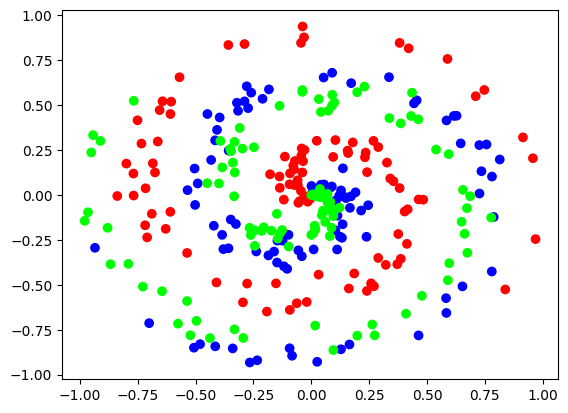

In [28]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Full code for forward and backward pass upto this point

In [29]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)
# Create Softmax classifier’s combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)

# Let’s see output of the first few samples:
print(loss_activation.output[:5])
# Print loss value
print('loss:', loss)
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)
# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)
# Print gradients
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.3333333  0.33333334]
 [0.3333335  0.333333   0.33333352]
 [0.33333334 0.33333334 0.33333334]]
loss: 1.0986118
acc: 0.33666666666666667
[[ 7.7209341e-05 -1.0590541e-04 -8.3512561e-05]
 [ 2.8525142e-04  6.1521474e-05 -9.9994701e-05]]
[[ 0.00036935 -0.00025332  0.00021116]]
[[ 1.0425548e-04  1.5916037e-05 -1.2017150e-04]
 [-4.9149978e-05  1.9419583e-04 -1.4504585e-04]
 [ 3.6147623e-05  1.0825427e-04 -1.4440189e-04]]
[[ 1.0384247e-05 -1.0518939e-05  3.9814040e-08]]


### Optimizer Gradient Descent- Iteratively updating weights and biases

In [30]:
# SGD optimizer
class Optimizer_SGD:
 # Initialize optimizer - set settings,
 # learning rate of 1. is default for this optimizer
 def __init__(self, learning_rate=0.5):
  self.learning_rate = learning_rate
 # Update parameters
 def update_params(self, layer):
  layer.weights += -self.learning_rate * layer.dweights
  layer.biases += -self.learning_rate * layer.dbiases

In [31]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD()

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


epoch: 0, acc: 0.337, loss: 1.099
epoch: 100, acc: 0.403, loss: 1.097
epoch: 200, acc: 0.407, loss: 1.084
epoch: 300, acc: 0.403, loss: 1.077
epoch: 400, acc: 0.403, loss: 1.075
epoch: 500, acc: 0.403, loss: 1.074
epoch: 600, acc: 0.400, loss: 1.073
epoch: 700, acc: 0.397, loss: 1.073
epoch: 800, acc: 0.400, loss: 1.072
epoch: 900, acc: 0.410, loss: 1.071
epoch: 1000, acc: 0.410, loss: 1.070
epoch: 1100, acc: 0.410, loss: 1.068
epoch: 1200, acc: 0.410, loss: 1.066
epoch: 1300, acc: 0.413, loss: 1.063
epoch: 1400, acc: 0.413, loss: 1.058
epoch: 1500, acc: 0.430, loss: 1.053
epoch: 1600, acc: 0.443, loss: 1.046
epoch: 1700, acc: 0.447, loss: 1.037
epoch: 1800, acc: 0.427, loss: 1.052
epoch: 1900, acc: 0.427, loss: 1.052
epoch: 2000, acc: 0.407, loss: 1.051
epoch: 2100, acc: 0.407, loss: 1.047
epoch: 2200, acc: 0.410, loss: 1.044
epoch: 2300, acc: 0.420, loss: 1.040
epoch: 2400, acc: 0.407, loss: 1.037
epoch: 2500, acc: 0.417, loss: 1.032
epoch: 2600, acc: 0.427, loss: 1.027
epoch: 2700, 

Can notice that the loss stagnated at a point and didn't improve! That's because we got stuck at a local minima.

If the LR is set high, then it will keep jumping and if it's set low, it would get stagnated at local minima(Like in our case).

And the soln is "MOMENTUM" to give a slight nudge, everytime we're trapped at local minima, and eventually we'll converge at global minima- optimal loss

#### Learning rate decay
Alpha= Alpha_0/1+decay*iter_number

decay generally set to 0.001 initially

Initially we start with high learning rate, that oscillates here and there, but does cover all the regions including global and local minima(exploration). Then as we iterate further, we can slow down the learning rate(exploitation), then it'll likely converge at the global minima. 

OPTIMIZER: LEARNING RATE DECAY

In [32]:
class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [33]:
import numpy as np

# Assuming the necessary classes (Layer_Dense, Activation_ReLU, 
# Activation_Softmax_Loss_CategoricalCrossentropy, and spiral_data) are defined elsewhere

X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(decay=1e-3)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.310, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.400, loss: 1.091, lr: 0.9099181073703367
epoch: 200, acc: 0.433, loss: 1.075, lr: 0.8340283569641367
epoch: 300, acc: 0.447, loss: 1.074, lr: 0.7698229407236336
epoch: 400, acc: 0.453, loss: 1.073, lr: 0.7147962830593281
epoch: 500, acc: 0.450, loss: 1.073, lr: 0.66711140760507
epoch: 600, acc: 0.447, loss: 1.072, lr: 0.6253908692933083
epoch: 700, acc: 0.443, loss: 1.071, lr: 0.5885815185403178
epoch: 800, acc: 0.430, loss: 1.069, lr: 0.5558643690939411
epoch: 900, acc: 0.433, loss: 1.066, lr: 0.526592943654555
epoch: 1000, acc: 0.423, loss: 1.062, lr: 0.5002501250625312
epoch: 1100, acc: 0.440, loss: 1.057, lr: 0.4764173415912339
epoch: 1200, acc: 0.430, loss: 1.051, lr: 0.45475216007276037
epoch: 1300, acc: 0.430, loss: 1.044, lr: 0.43497172683775553
epoch: 1400, acc: 0.433, loss: 1.036, lr: 0.4168403501458941
epoch: 1500, acc: 0.413, loss: 1.028, lr: 0.4001600640256102
epoch: 1600, acc: 0.423, loss: 1.020, lr: 0.38476337

We can see loss didn't stagnate like earlier (optimizer without learning rate decay). Here the accuracy is 0.773 after 1000 iter (previously 0.60), and loss also steadily decrease to 0.59 (previosuly 0.79 - which also stagnated)

This optimizer doesn't guarantee Global minima, but definitely is better than fixed learning rate!!

So further improve, we can look into Optimizer with Momentum

#### Optimizer with Momentum & Learning rate decay

Gradient Descent without momentum, bounces back & forth.

Gradient Descent with momentum has reduced oscillations as "Past matters", it uses prev update direction to influce next update.


W^t= W^(t-1) - Alpha_0(DL/DW) + Momentum factor * Previous Weight update

Momentum factor * Previous Weight update-> Direction of previous changes 

In [34]:
import numpy as np

class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If we use momentum
        if self.momentum:
            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = self.momentum * layer.weight_momentums - \
                             self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = self.momentum * layer.bias_momentums - \
                           self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [35]:
import numpy as np

# Assuming the necessary classes (Layer_Dense, Activation_ReLU, 
# Activation_Softmax_Loss_CategoricalCrossentropy, Optimizer_SGD, and spiral_data) are defined elsewhere

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(decay=1e-3, momentum=0.9)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.323, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.477, loss: 1.026, lr: 0.9099181073703367
epoch: 200, acc: 0.443, loss: 0.945, lr: 0.8340283569641367
epoch: 300, acc: 0.610, loss: 0.826, lr: 0.7698229407236336
epoch: 400, acc: 0.657, loss: 0.727, lr: 0.7147962830593281
epoch: 500, acc: 0.670, loss: 0.681, lr: 0.66711140760507
epoch: 600, acc: 0.697, loss: 0.641, lr: 0.6253908692933083
epoch: 700, acc: 0.713, loss: 0.620, lr: 0.5885815185403178
epoch: 800, acc: 0.723, loss: 0.607, lr: 0.5558643690939411
epoch: 900, acc: 0.727, loss: 0.599, lr: 0.526592943654555
epoch: 1000, acc: 0.720, loss: 0.589, lr: 0.5002501250625312
epoch: 1100, acc: 0.727, loss: 0.579, lr: 0.4764173415912339
epoch: 1200, acc: 0.727, loss: 0.570, lr: 0.45475216007276037
epoch: 1300, acc: 0.727, loss: 0.565, lr: 0.43497172683775553
epoch: 1400, acc: 0.730, loss: 0.561, lr: 0.4168403501458941
epoch: 1500, acc: 0.733, loss: 0.558, lr: 0.4001600640256102
epoch: 1600, acc: 0.733, loss: 0.555, lr: 0.38476337

We can see that the accuracy is 96%!!

#### Optimizers-Adagrad

Previous we had the same learning rate- step size for each and every parameter(all weights and biases), but we need to see if a gradient of a weight or bias is high, we want it's learning rate to be low (otherwise it'll change by a huge amount)
Similarly if gradient is low, we want it's step size/learning rate(alpha) to be high (otherwise it won't change at all).

Entire Adagrad depends on this concept- "ALL PARAMETERS CAN HAVE DIFFERENT LEARNING RATES"


For a parameter, maintain history: cache= cache + (param_gradient)**2
For parameter update: Alpha * parameter_gradient / root(cache+epsilon) 

parameter_gradient: w=w-alpha*
alpha: ~1 with decay
cache : if high, step size low & inverse
epsilon: hyperparam to prevent division by zero
 

In [36]:
import numpy as np

# Adagrad optimizer
class Optimizer_Adagrad:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * \
            layer.dweights / \
            (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
            layer.dbiases / \
            (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [37]:
import numpy as np

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
# optimizer = Optimizer_SGD(decay=8e-8, momentum=0.9)
optimizer = Optimizer_Adagrad(decay=1e-4)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.287, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.507, loss: 0.981, lr: 0.9901970492127933
epoch: 200, acc: 0.487, loss: 0.938, lr: 0.9804882831650161
epoch: 300, acc: 0.497, loss: 0.910, lr: 0.9709680551509855
epoch: 400, acc: 0.517, loss: 0.885, lr: 0.9616309260505818
epoch: 500, acc: 0.537, loss: 0.861, lr: 0.9524716639679969
epoch: 600, acc: 0.573, loss: 0.838, lr: 0.9434852344560807
epoch: 700, acc: 0.593, loss: 0.825, lr: 0.9346667912889054
epoch: 800, acc: 0.593, loss: 0.814, lr: 0.9260116677470135
epoch: 900, acc: 0.603, loss: 0.803, lr: 0.9175153683824203
epoch: 1000, acc: 0.577, loss: 0.796, lr: 0.9091735612328392
epoch: 1100, acc: 0.580, loss: 0.787, lr: 0.9009820704567978
epoch: 1200, acc: 0.580, loss: 0.780, lr: 0.892936869363336
epoch: 1300, acc: 0.593, loss: 0.770, lr: 0.8850340738118416
epoch: 1400, acc: 0.590, loss: 0.766, lr: 0.8772699359592947
epoch: 1500, acc: 0.590, loss: 0.760, lr: 0.8696408383337683
epoch: 1600, acc: 0.613, loss: 0.752, lr: 0.86214328

We can see momentum has done better than adagrad. So in some cases, momentum will do better.

Disadvantage of Adagrad: As iterations inc, cache will constantly inc and denominator becomes very high -- so learning rate with stagnate (stepsize will be very small)

#### Optimizer - RMSProp
Uses ideas of Adagrad (to accumulate gradient and & individual learning rate) and momentum (gives importance to the past and present)

cache= rho*cache +(1-rho)*gradient^2

With rho we give a lot of importance(weightage) to the past than the present.

rho(cache memory decay rate) ~ 0.9 



In [38]:
import numpy as np

class Optimizer_RMSprop:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
                             (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
                           (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [39]:
import numpy as np

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
# optimizer = Optimizer_SGD(decay=8e-8, momentum=0.9)
#optimizer = Optimizer_Adagrad(decay=1e-4)
#optimizer = Optimizer_RMSprop(decay=1e-4)
optimizer = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5,rho=0.999)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.333, loss: 1.099, lr: 0.02
epoch: 100, acc: 0.380, loss: 1.053, lr: 0.01998021958261321
epoch: 200, acc: 0.493, loss: 1.008, lr: 0.019960279044701046
epoch: 300, acc: 0.470, loss: 0.989, lr: 0.019940378268975763
epoch: 400, acc: 0.510, loss: 0.997, lr: 0.01992051713662487
epoch: 500, acc: 0.440, loss: 0.942, lr: 0.01990069552930875
epoch: 600, acc: 0.503, loss: 0.935, lr: 0.019880913329158343
epoch: 700, acc: 0.537, loss: 0.917, lr: 0.019861170418772778
epoch: 800, acc: 0.543, loss: 0.909, lr: 0.019841466681217078
epoch: 900, acc: 0.537, loss: 0.905, lr: 0.01982180200001982
epoch: 1000, acc: 0.547, loss: 0.906, lr: 0.019802176259170884
epoch: 1100, acc: 0.533, loss: 0.887, lr: 0.01978258934311912
epoch: 1200, acc: 0.530, loss: 0.885, lr: 0.01976304113677013
epoch: 1300, acc: 0.507, loss: 0.907, lr: 0.019743531525483964
epoch: 1400, acc: 0.567, loss: 0.860, lr: 0.01972406039507293
epoch: 1500, acc: 0.567, loss: 0.871, lr: 0.019704627631799327
epoch: 1600, acc: 0.563, lo

#### ADAM optimizer!!!

The best of all..
Combines momentum with adaptive learning rates

momentums= Beta1 *momentums + (1-Beta1)*gradient
cache= Beta2*cache + (1-Beta2)*gradient^2

momentums_corrected= momentums/(1-Beta1^(t+1))
cache_corrected= cache/(1-Beta2^(t+1))

update (weight/bias) = current (weight/bias) - (alpha* momentums_corrected/(sqrt(cache_correct + epsilon)))






In [40]:
import numpy as np

# Adam optimizer
class Optimizer_Adam:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Get corrected momentum
        # self.iteration is 0 at first pass and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [43]:
import numpy as np

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
#optimizer = Optimizer_SGD(decay=8e-8, momentum=0.9)
#optimizer = Optimizer_Adagrad(decay=1e-4)
#optimizer = Optimizer_RMSprop(decay=1e-4)
#optimizer = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5,rho=0.999)

optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.380, loss: 1.099, lr: 0.02
epoch: 100, acc: 0.513, loss: 0.956, lr: 0.01998021958261321
epoch: 200, acc: 0.653, loss: 0.843, lr: 0.019960279044701046
epoch: 300, acc: 0.720, loss: 0.709, lr: 0.019940378268975763
epoch: 400, acc: 0.743, loss: 0.656, lr: 0.01992051713662487
epoch: 500, acc: 0.763, loss: 0.611, lr: 0.01990069552930875
epoch: 600, acc: 0.763, loss: 0.588, lr: 0.019880913329158343
epoch: 700, acc: 0.783, loss: 0.559, lr: 0.019861170418772778
epoch: 800, acc: 0.797, loss: 0.543, lr: 0.019841466681217078
epoch: 900, acc: 0.787, loss: 0.523, lr: 0.01982180200001982
epoch: 1000, acc: 0.817, loss: 0.497, lr: 0.019802176259170884
epoch: 1100, acc: 0.827, loss: 0.485, lr: 0.01978258934311912
epoch: 1200, acc: 0.837, loss: 0.472, lr: 0.01976304113677013
epoch: 1300, acc: 0.813, loss: 0.465, lr: 0.019743531525483964
epoch: 1400, acc: 0.853, loss: 0.431, lr: 0.01972406039507293
epoch: 1500, acc: 0.857, loss: 0.417, lr: 0.019704627631799327
epoch: 1600, acc: 0.857, lo

Testing with Sample Data

In [44]:
# Validate the model
# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=3)
# Perform a forward pass of our testing data through this layer
dense1.forward(X_test)
# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y_test)
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
 y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.817, loss: 0.530


Can observe that the model doesn't perform that well on the unseen data. 
So we'll further do-
1. K-fold validation testing- to fix on optimal hyperparameters like- no of layers, no of units, LR, decay rate, beta 1, beta2 etc etc
2. Training using the optimal hyperparameters- to find optimal weights and biases and finalize the model 
3. Testing the model on unseen data- to check the performance of the model on unseen data.